In [2]:
import pandas as pd

dados = pd.read_csv('../data/processed/train_data_prep01.csv')


In [3]:
dados.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
0,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,3,NaN,10.0,1,No description yet,18-6-2018,27
1,razer blackwidow chroma keyboard,Electronics,Computers & Tablets,Components & Parts,3,Razer,52.0,0,This keyboard is in great condition and works ...,18-3-2018,15
2,ava viv blouse,Women,Tops & Blouses,Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,26-10-2018,14
3,leather horse statues,Home,Home Décor,Home Décor Accents,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,21-2-2018,1
4,24k gold plated rose,Women,Jewelry,Necklaces,1,NaN,44.0,0,Complete with certificate of authenticity,17-4-2018,13


Análise da colna `nome`

In [5]:
qtd_itens_unicos = dados.name.nunique()
qtd_registros = len(dados)
porcetagem_registros_unicos = 100 * qtd_itens_unicos / qtd_registros

print('Quantidade de registros do dataset: ', qtd_registros)
print('Quantidade de itens únicos: ', qtd_itens_unicos)
print('Porcentagem de itens únicos em relação ao total de registros: ', porcetagem_registros_unicos, '%')

Quantidade de registros do dataset:  1481661
Quantidade de itens únicos:  1081584
Porcentagem de itens únicos em relação ao total de registros:  72.99807445832751 %


Top 10 itens que mais aparecem no dataset

In [10]:
dados.name.value_counts().head(10)

bundle                  3455
lularoe tc leggings     1146
reserved                 942
lularoe os leggings      913
miss me jeans            755
on hold                  737
coach purse              715
american eagle jeans     692
michael kors purse       569
converse                 496
Name: name, dtype: int64

Overview do produto mais comum do dataset `bundle`

In [11]:
dados.query('name == "bundle"')

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
122,bundle,NaN,NaN,NaN,3,NaN,59.0,0,Sizes and info of clothes can be found on thei...,27-9-2018,25
290,bundle,Other,Other,Other,1,NaN,81.0,0,[rm] Discounted price [rm],2-9-2018,8
932,bundle,Women,Sweaters,Poncho,1,NaN,26.0,0,1pc Oversize Turtle Neck Plaid Poncho Cape 1pc...,7-5-2018,13
1053,bundle,Electronics,Video Games & Consoles,Games,3,Nintendo,22.0,1,Minor play scratches Played with condition Tha...,24-1-2018,24
2157,bundle,Women,Skirts,"Straight, Pencil",2,NaN,36.0,1,Please check to see if its all,1-4-2018,21
...,...,...,...,...,...,...,...,...,...,...,...
1479996,bundle,Women,Swimwear,Two-Piece,2,NaN,55.0,1,"This bundle Includes: 1.""PoolSide"" Two Piece S...",10-8-2018,41
1480466,bundle,Women,Dresses,Knee-Length,3,NaN,59.0,0,Cute color for spring ! Has pockets Size M Use...,3-12-2018,11
1481519,bundle,Women,Jewelry,Necklaces,1,NaN,8.0,0,:),30-5-2018,1
1481584,bundle,Women,Dresses,"Above Knee, Mini",3,NaN,11.0,1,"everything must go, I love to bundle!",5-9-2018,37


Análise das colunas de categorias

In [13]:
dados.category_1.value_counts(normalize=True)

Women                     0.450057
Beauty                    0.140797
Kids                      0.116281
Electronics               0.083121
Men                       0.063449
Home                      0.045976
Vintage & Collectibles    0.031531
Other                     0.030724
Handmade                  0.020900
Sports & Outdoors         0.017163
Name: category_1, dtype: float64

In [15]:
dados.category_2.nunique()

113

In [16]:
dados.category_2.value_counts(normalize=True).head(10)

Athletic Apparel             0.091044
Makeup                       0.084433
Tops & Blouses               0.072451
Shoes                        0.068041
Jewelry                      0.041841
Toys                         0.039391
Cell Phones & Accessories    0.036109
Women's Handbags             0.031063
Dresses                      0.030996
Women's Accessories          0.028689
Name: category_2, dtype: float64

In [17]:
dados.category_3.nunique()

870

In [18]:
dados.category_3.value_counts(normalize=True).head(10)

Pants, Tights, Leggings    0.040771
Other                      0.034025
Face                       0.033989
T-Shirts                   0.031416
Shoes                      0.021783
Games                      0.020940
Lips                       0.020918
Athletic                   0.018326
Eyes                       0.017637
Cases, Covers & Skins      0.016720
Name: category_3, dtype: float64

In [20]:
dados.groupby('category_1')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category_1,,,,,,,,
Beauty,207725.0,19.681290,21.360937,3.0,10.0,15.0,24.0,2000.0
Electronics,122632.0,35.190558,65.430780,3.0,9.0,15.0,31.0,1909.0
Handmade,30835.0,18.160694,27.760091,3.0,6.0,12.0,20.0,1750.0
Home,67831.0,24.551068,24.416986,3.0,12.0,18.0,29.0,848.0
Kids,171555.0,20.658439,22.732427,3.0,10.0,14.0,24.0,809.0
Men,93609.0,34.734940,41.244610,3.0,14.0,21.0,40.0,1309.0
Other,45329.0,20.819917,29.851479,3.0,9.0,14.0,23.0,1400.0
Sports & Outdoors,25322.0,25.552385,29.305013,3.0,11.0,16.0,28.0,915.0
Vintage & Collectibles,46519.0,27.345891,53.512169,3.0,10.0,16.0,27.0,1709.0


Análise dos preços

In [22]:
dados.price.describe().round(2)

count    1481661.00
mean          26.75
std           38.59
min            3.00
25%           10.00
50%           17.00
75%           29.00
max         2009.00
Name: price, dtype: float64

In [26]:
dados.date = pd.to_datetime(dados.date, dayfirst=True)

<AxesSubplot:xlabel='date', ylabel='price'>

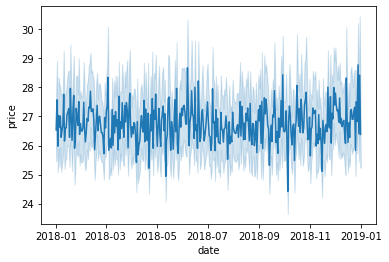

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(data=dados., x='date', y='price')

In [34]:
dados.set_index = dados.date

In [36]:
dados.category_1.unique()

array(['Men', 'Electronics', 'Women', 'Home', 'Sports & Outdoors',
       'Vintage & Collectibles', 'Beauty', 'Other', 'Kids', nan,
       'Handmade'], dtype=object)

<AxesSubplot:xlabel='date'>

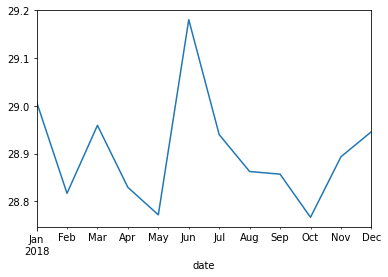

In [40]:
produtos_femininos = dados.query('category_1 == "Women"')

produtos_femininos.resample('M').mean().price.plot()

In [42]:
produtos_beleza = dados.query('category_1 == "Beauty"')

produtos_beleza.mean().price.plot()

/tmp/ipykernel_4517/2114278893.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  produtos_beleza.mean().price.plot()


KeyboardInterrupt: 

In [ ]:
produtos_infantis = dados.query('category_1 == "Kids"')

produtos_beleza.mean().price.plot()